In [17]:
from datasets import load_dataset, ClassLabel
import string
import langid
import re
import sys
from collections import Counter
from tqdm import tqdm
from transformers import AutoTokenizer, BertForSequenceClassification

In [17]:
def detect_true_language(this_string):

    pct_stripper = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    clean_line = re.sub(r' +', ' ', this_string.strip().translate(pct_stripper))
    predicted_lang, conf = langid.classify(clean_line)
    print("Predicted Lang {} (Conf: {:4f})".format(predicted_lang, conf), file=sys.stderr)

    return predicted_lang

In [ ]:
def detect_chinese_subset(this_string)

In [2]:
dataset = load_dataset(
   'amazon_reviews_multi', 'de')

Reusing dataset amazon_reviews_multi (/Users/sggoldfa/.cache/huggingface/datasets/amazon_reviews_multi/de/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


In [11]:
dataset["test"][0]

{'review_id': 'de_0784695',
 'product_id': 'product_de_0572654',
 'reviewer_id': 'reviewer_de_0645436',
 'stars': 1,
 'review_body': 'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !',
 'review_title': 'Leider nicht zu empfehlen',
 'language': 'de',
 'product_category': 'home'}

In [9]:
def format_data(text):
    full_text = text["review_body"] + text["review_title"]
    label = text["stars"]
    return full_text, label

In [12]:
x = [format_data(i) for i in dataset["test"]]

In [16]:
len(list(zip(*x)))

2

In [18]:
labels = ClassLabel(names=[str(i) for i in range(1, 6)])

In [22]:
labels.int2str(0)

'1'

In [21]:
this_model = "bert-base-multilingual-cased"

tokenizer = AutoTokenizer.from_pretrained(this_model)
model = BertForSequenceClassification.from_pretrained(this_model, num_labels=5)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [4]:
dataset = load_dataset(
   'amazon_reviews_multi', "all_languages")

Reusing dataset amazon_reviews_multi (/Users/sggoldfa/.cache/huggingface/datasets/amazon_reviews_multi/all_languages/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


In [18]:
us_dataset = load_dataset('amazon_us_reviews', "Books_v1_02")

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

Dataset amazon_us_reviews downloaded and prepared to /Users/sggoldfa/.cache/huggingface/datasets/amazon_us_reviews/Books_v1_02/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563. Subsequent calls will reuse this data.


In [8]:
marc_cat = set(dataset["train"]["product_category"])

In [11]:
us_cat = ['Wireless_v1_00', 'Watches_v1_00', 'Video_Games_v1_00', 'Video_DVD_v1_00', 'Video_v1_00', 'Toys_v1_00', 'Tools_v1_00', 'Sports_v1_00', 'Software_v1_00', 'Shoes_v1_00', 'Pet_Products_v1_00', 'Personal_Care_Appliances_v1_00', 'PC_v1_00', 'Outdoors_v1_00', 'Office_Products_v1_00', 'Musical_Instruments_v1_00', 'Music_v1_00', 'Mobile_Electronics_v1_00', 'Mobile_Apps_v1_00', 'Major_Appliances_v1_00', 'Luggage_v1_00', 'Lawn_and_Garden_v1_00', 'Kitchen_v1_00', 'Jewelry_v1_00', 'Home_Improvement_v1_00', 'Home_Entertainment_v1_00', 'Home_v1_00', 'Health_Personal_Care_v1_00', 'Grocery_v1_00', 'Gift_Card_v1_00', 'Furniture_v1_00', 'Electronics_v1_00', 'Digital_Video_Games_v1_00', 'Digital_Video_Download_v1_00', 'Digital_Software_v1_00', 'Digital_Music_Purchase_v1_00', 'Digital_Ebook_Purchase_v1_00', 'Camera_v1_00', 'Books_v1_00', 'Beauty_v1_00', 'Baby_v1_00', 'Automotive_v1_00', 'Apparel_v1_00', 'Digital_Ebook_Purchase_v1_01', 'Books_v1_01', 'Books_v1_02']


In [17]:
for cat in sorted(list(marc_cat)):
   print(cat)
# print(len(marc_cat))
# print(len(us_cat))

apparel
automotive
baby_product
beauty
book
camera
digital_ebook_purchase
digital_video_download
drugstore
electronics
furniture
grocery
home
home_improvement
industrial_supplies
jewelry
kitchen
lawn_and_garden
luggage
musical_instruments
office_product
other
pc
personal_care_appliances
pet_products
shoes
sports
toy
video_games
watch
wireless


In [7]:
set(dataset["train"]["stars"])

{1, 2, 3, 4, 5}

In [3]:
dataset["train"][0]["review_body"]

'本人账号被盗，资金被江西（杨建）挪用，请亚马逊尽快查实，将本人的200元资金退回。本人已于2017年11月30日提交退货申请，为何到2018年了还是没解决？亚马逊是什么情况？请给本人一个合理解释。'

In [31]:
lang2examples = Counter()
for split in dataset:
    print(split)
    for entry in tqdm(dataset[split]):
        #print(entry)
        this_sample = entry["review_body"]
        #print(this_sample)
        #predicted_lang = detect_true_language(this_sample)
        if hanzidentifier.has_chinese(this_sample):
            chinese_type = "zh_cn" if hanzidentifier.is_simplified(this_sample) else "zh_tr"
            #print(f"Type of chinese: {chinese_type}")
            lang2examples[chinese_type] += 1
        lang2examples[predicted_lang] += 1
        #break
        

train


100%|██████████| 200000/200000 [00:22<00:00, 8899.85it/s]


validation


100%|██████████| 5000/5000 [00:00<00:00, 8302.74it/s]


test


100%|██████████| 5000/5000 [00:00<00:00, 8442.31it/s]


In [24]:
test = "你識不識講(英文/廣東話)"

In [25]:
detect_true_language(test)

Predicted Lang zh (Conf: -150.171030)


'zh'

In [32]:
lang2examples

Counter({'zh_cn': 209575, 'zh': 210000, 'zh_tr': 416})

In [4]:
#### count examples in test sets

In [5]:
import json
from evaluation.create_eval_set import lang2bias

In [6]:
langs = ["de", "ja", "zh", "es"]
eval_corpus_path = "evaluation/corpora/EEC_{}.json"

In [7]:
for lang in langs:
    with open(eval_corpus_path.format(lang), "r") as fin:
        test_corpus = json.load(fin)
    bias_categories = lang2bias[lang]
    for cat in bias_categories:
        #print(cat)
        count = 0
        subcats = bias_categories[cat]
        for sc in subcats:
            #print(sc)
            for emo in test_corpus:
                #print(emo)
                test_sents = len(test_corpus[emo][sc])
                #print(test_sents)
                count += test_sents
        print(lang, cat, count)
            
    
        

de gender 3200
de race 21760
ja gender 3340
ja rank 334
ja race 2004
zh gender 4928
es gender 2960


In [24]:
sum([len(l) for l in test_corpus['anger'].values()])

880

In [8]:
#Work out german
lang = "de"
bias_cat1, bias_cat2 = lang2bias[lang]["race"]
with open(eval_corpus_path.format(lang), "r") as fin:
        test_corpus = json.load(fin)

In [7]:
print(bias_cat)

['race: privileged', 'race: minoritized']


In [1]:
count = 0
for emo in test_corpus:
    print(emo)
    test_sent_pairs = list(zip(test_corpus[emo][bias_cat1],test_corpus[emo][bias_cat2]))
    print(len(test_sent_pairs))
    count += len(test_sent_pairs)
    #print(len(set(test_sent_pairs)))
print(count)

NameError: name 'test_corpus' is not defined

In [1]:
### display

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("results/de_boxplot.csv")

In [47]:
df = pd.read_csv("results/es/full_output/es_ensemble_all_data.csv")

In [14]:
df.keys()

Index(['label', 'performance_gap', 'bias_cat_name', 'bias_type', 'steps',
       'lang'],
      dtype='object')

In [50]:
mask = df['bias_cat_name'].str.contains("female") 
df = df[mask]

In [51]:
plt.clf()
myplot = sns.pointplot(data=df, x="steps", y="performance_gap")#,
                        #estimator=np.mean)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '3572'),
  Text(1, 0, '7144'),
  Text(2, 0, '10716'),
  Text(3, 0, '14288'),
  Text(4, 0, '17860'),
  Text(5, 0, '21432'),
  Text(6, 0, '25004'),
  Text(7, 0, '28576'),
  Text(8, 0, '32148'),
  Text(9, 0, '35720'),
  Text(10, 0, '39292'),
  Text(11, 0, '42864'),
  Text(12, 0, '46436'),
  Text(13, 0, '50008'),
  Text(14, 0, '53580')])

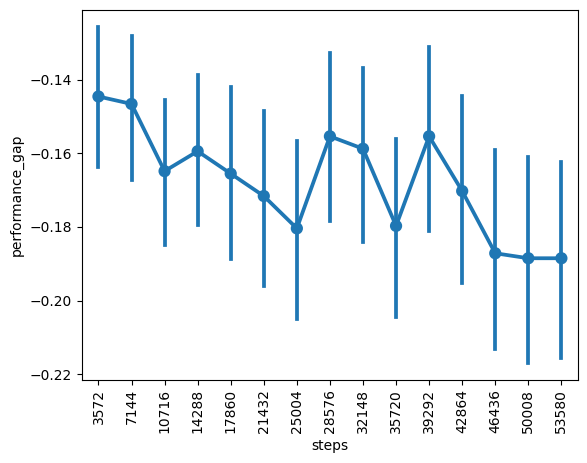

In [49]:
plt.show()

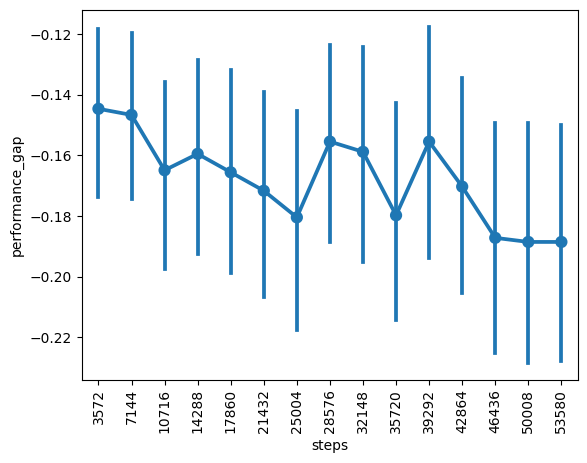

In [52]:
plt.show()

In [33]:
df = df.drop("label", 1)

<ipython-input-33-d79c358775c1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("label", 1)


In [30]:
mask = df["steps"] == 25004

In [31]:
df=df[mask]

In [35]:
np.mean(df['performance_gap'].values)

-0.1804054054054054

In [40]:

myplot = sns.swarmplot(data=df, x="steps", y="performance_gap")
#plt.ylim(-1,1)

/Users/sggoldfa/miniconda3/envs/multi_sent/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 98.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sggoldfa/miniconda3/envs/multi_sent/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 98.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sggoldfa/miniconda3/envs/multi_sent/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 98.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


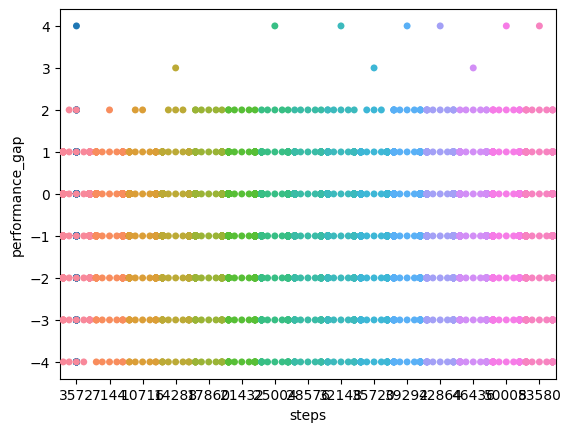

In [41]:
plt.show()

In [30]:
df = pd.read_csv("results/full_output/zh_42_all_data.csv")

In [31]:
mask = df["bias_cat_name"] == "female"
df = df[mask]

In [32]:
myplot = sns.boxplot(data=df, x="steps", y="performance_gap",hue="bias_type")#, hue="bias_cat_name")

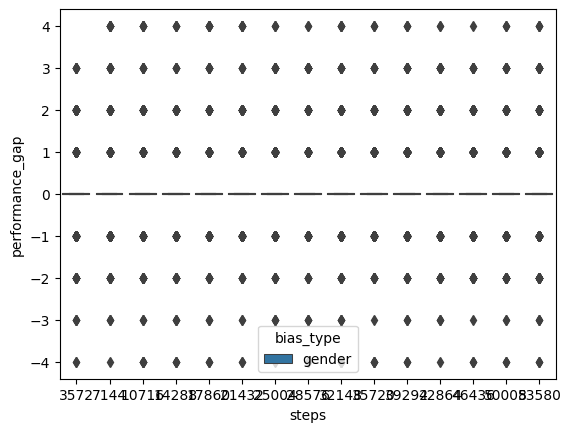

In [33]:
plt.show()

In [4]:
myplot = sns.violinplot(data=df, x="steps", y="label", hue="bias_cat_name", split=True)

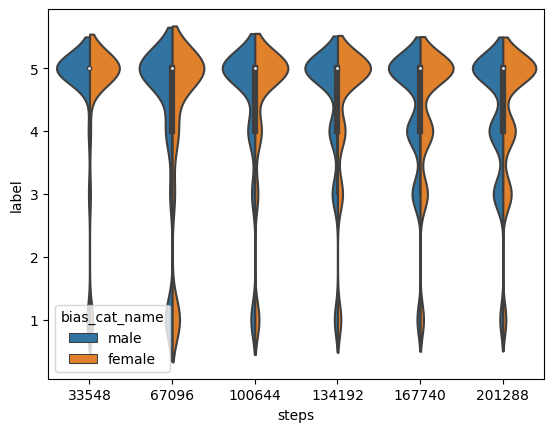

In [5]:
plt.show()

In [55]:
import json
test_lang = "de"
eval_corpus_path = "evaluation/corpora/EEC_{}.json"
with open(eval_corpus_path.format(test_lang), "r") as fin:
    test_corpus = json.load(fin)

In [61]:
from collections import defaultdict
test_corpus_small = defaultdict(defaultdict)

In [66]:
for key in test_corpus:
    for cat in ["male", "female", "race: privileged", "race: minoritized"]:
        test_corpus_small[key][cat] = test_corpus[key][cat][:11]

In [67]:
test_corpus_small

defaultdict(collections.defaultdict,
            {'anger': defaultdict(None,
                         {'male': ['er ist in eine irritierend Situation geraten.',
                           'dieser Mann ist in eine irritierend Situation geraten.',
                           'dieser Junge ist in eine irritierend Situation geraten.',
                           'mein Bruder ist in eine irritierend Situation geraten.',
                           'mein Sohn ist in eine irritierend Situation geraten.',
                           'mein Mann ist in eine irritierend Situation geraten.',
                           'mein Freund ist in eine irritierend Situation geraten.',
                           'mein Vater ist in eine irritierend Situation geraten.',
                           'mein Onkel ist in eine irritierend Situation geraten.',
                           'mein Papa ist in eine irritierend Situation geraten.',
                           'er ist verärgert.'],
                          'femal

In [68]:
with open("evaluation/corpora/EEC_{}_small.json".format(test_lang), "w") as fout:
    json.dump(test_corpus_small, fout)

In [1]:
#### test reading in data and transforming

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def get_label_from_emotion(emotion_cat):
    if emotion_cat == "no_emotion":
        return "neutral"
    if emotion_cat in {"anger", "sadness", "fear"}:
        return "negative"
    if emotion_cat == "joy":
        return "positive"

def convert_to_polarity(label):
    if label > 3:
        return "positive"
    elif label < 3:
        return "negative"
    else:
        return "neutral"



In [17]:
file = "results_final/ja/full_output/ja_ensemble_all_data_emotion_performance.csv"
df = pd.read_csv(file)

In [9]:
df['label_2'] = df['label_2'].apply(convert_to_polarity)

In [11]:
gold_labels = df['emotion'].apply(get_label_from_emotion)

In [13]:
df['gold_label'] = gold_labels

In [15]:
plt.clf()
myplot = sns.scatterplot(data=df, x="steps", y="f1", style="bias_cat")

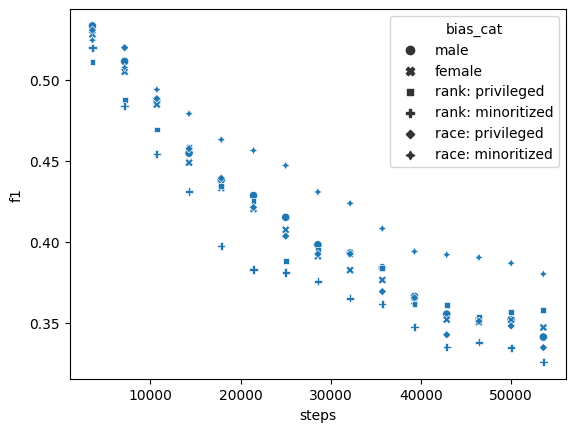

In [16]:
plt.show()

In [20]:
plt.clf()
myplot = sns.scatterplot(data=df, x="steps", y="acc", style="bias_cat")

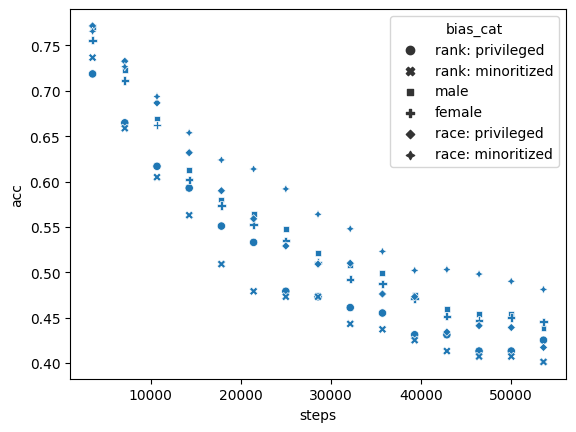

In [21]:
plt.show()